<a href="https://colab.research.google.com/github/ajbrewerlaw/ajbrewerlaw.github.io/blob/main/ISEN_370_Module_2_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ISEN 370 Project 2 Assignment
In this assignment, you will use data science tools to exlore two datasets, calculate confidence intervals and conduct a hypothesis testing on the given datasets.
You can use ISEN 370 Project 2 Demo file as a reference when completing this assignment.


First, you will need to import required libraries to the project.

In [ ]:

import numpy as np

In [ ]:
import pandas as pd

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import scipy.stats as stats

## Data Import

The Learning Enhanced Watershed Assessment System (LEWAS) is a unique real-time water and weather monitoring system. The LEWAS monitoring site is installed at the outfall of the Webb Branch watershed on Virginia Tech’s campus. Webb Branch is an urban stream with a 2.78 square kilometer (about one square mile) watershed consisting of residential and commercial properties. The stream is routed through man-made channels and culverts until it discharges at the LEWAS monitoring site. We first import the LEWAS datasets and print the first 10 rows of data. The data is stored in CSV files for which the path is given in the cell below. There are two CSV files, the first contains data from 9/01/17-9/30/17 and the second contains data from 10/01/17-10/31/17.
The following codes provide the link to where the data are stored.

In [ ]:
data_url3='https://github.com/StevenXJiang/DataScienceModule2/raw/main/LEWAS_Storm_Data_Demo_3.csv'
data_url4='https://github.com/StevenXJiang/DataScienceModule2/raw/main/LEWAS_Storm_Data_Demo_4.csv'

## Exploring Data

* Display the first 10 rows of data ufor each of the two data sets mentioned above.

In [ ]:
df1=pd.read_csv(data_url3)
df1.head(10)

,Date and Time,Water Temperature (F),Est. Flow Rate[m^3/s]
0,9/1/17 12:01 AM,66.236,0.051211
1,9/1/17 12:04 AM,66.236,0.042161
2,9/1/17 12:07 AM,66.146,0.029130
3,9/1/17 12:10 AM,66.200,0.029003
4,9/1/17 12:13 AM,66.236,0.023817
5,9/1/17 12:16 AM,66.254,0.013823
6,9/1/17 12:19 AM,66.272,0.010061
7,9/1/17 12:22 AM,66.290,0.008013
8,9/1/17 12:25 AM,66.254,0.004908
9,9/1/17 12:28 AM,66.290,0.005631


In [ ]:
df2=pd.read_csv(data_url4)
df2.head(10)

,Date and Time,Water Temperature (F),Estimated Flow Rate (m3/s)
0,10/1/2017 0:19,62.096,0.029084
1,10/1/2017 0:30,61.916,0.032962
2,10/1/2017 0:36,61.862,0.026500
3,10/1/2017 13:25,60.512,0.018774
4,10/1/2017 13:35,60.494,0.016194
5,10/1/2017 13:48,60.566,0.013135
6,10/1/2017 14:33,60.836,0.014517
7,10/1/2017 16:40,62.114,0.011127
8,10/1/2017 17:32,62.204,0.006843
9,10/1/2017 17:46,62.150,0.004584


## Exploring Data
Generate **two** scatter plots: one for the estimated flow rate data in September 2017 and the other for the estimated flow rate data in October 2017. Make sure to provide the title, x axis label and y axis label for your scatter plots.

## Scatter Plot 1

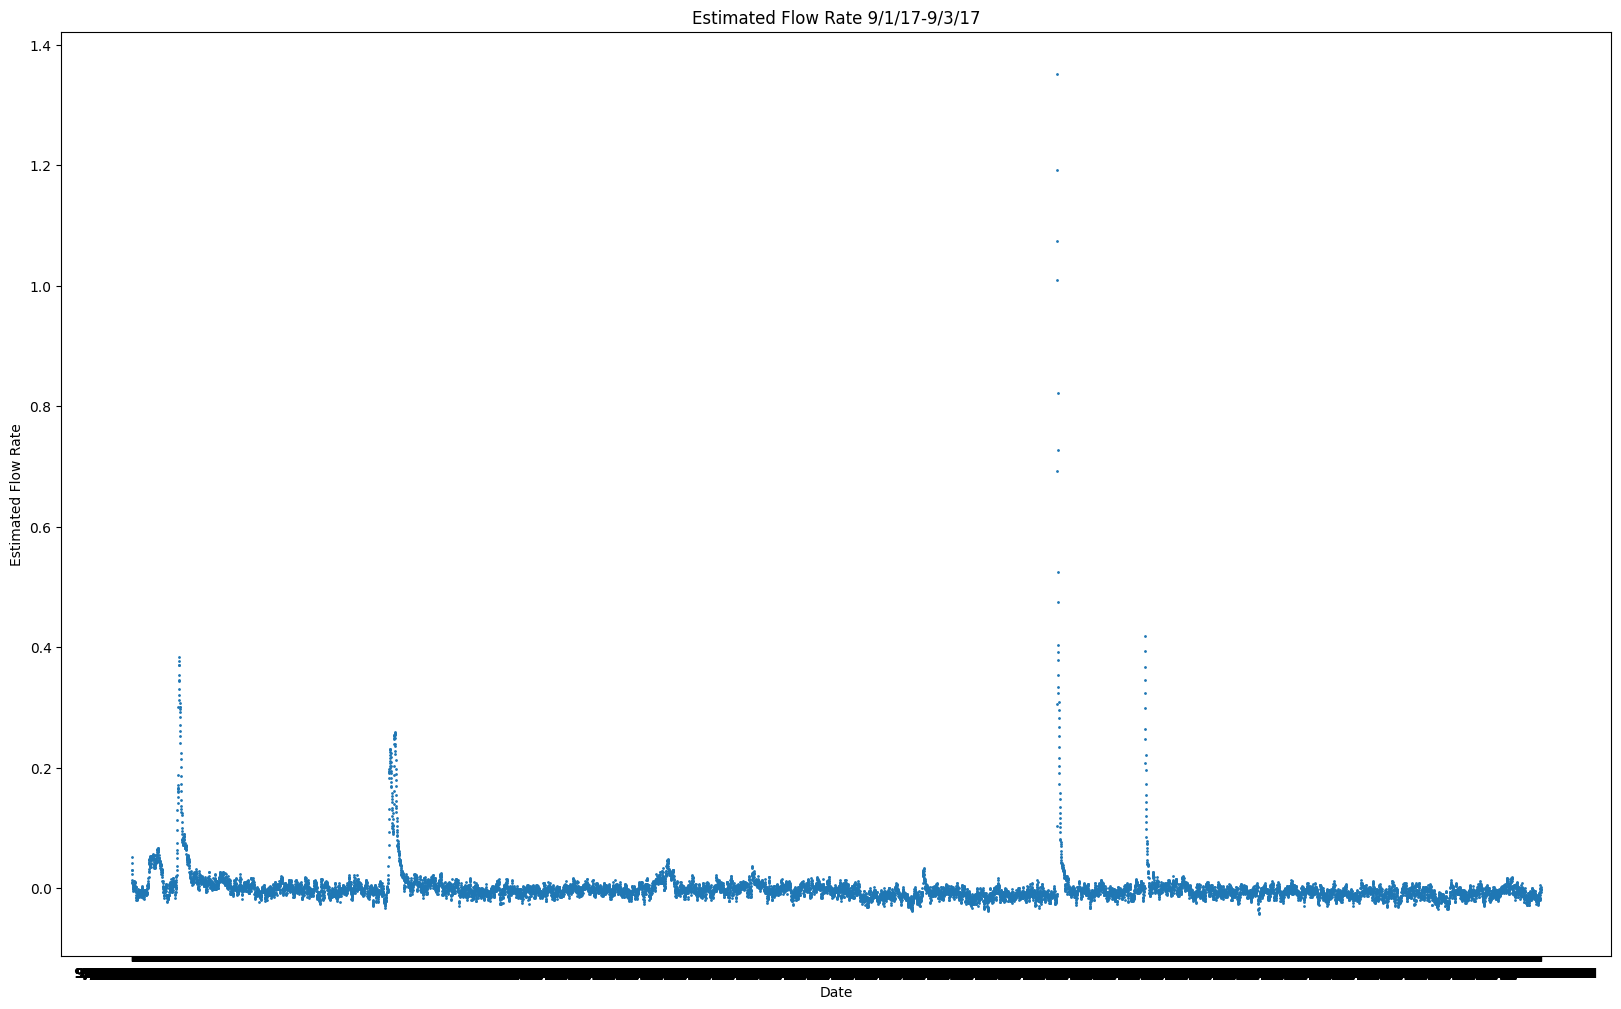

In [ ]:
plt.figure(figsize=(20,12))
plt.scatter(df1["Date and Time"], df1["Est. Flow Rate[m^3/s]"], s=1)
plt.title("Estimated Flow Rate 9/1/17-9/3/17")
plt.xlabel("Date")
plt.ylabel('Estimated Flow Rate (m3/s)')
plt.show()

Comment on the trend of Est. Flow Rate[m^3/s] for September 2017.
<br>
**Answer:**  
<BR>

The up-and-down pattern is consistent throughout the plot, suggesting a periodic relationship between the temperature and the date.

## Scatter Plot 2

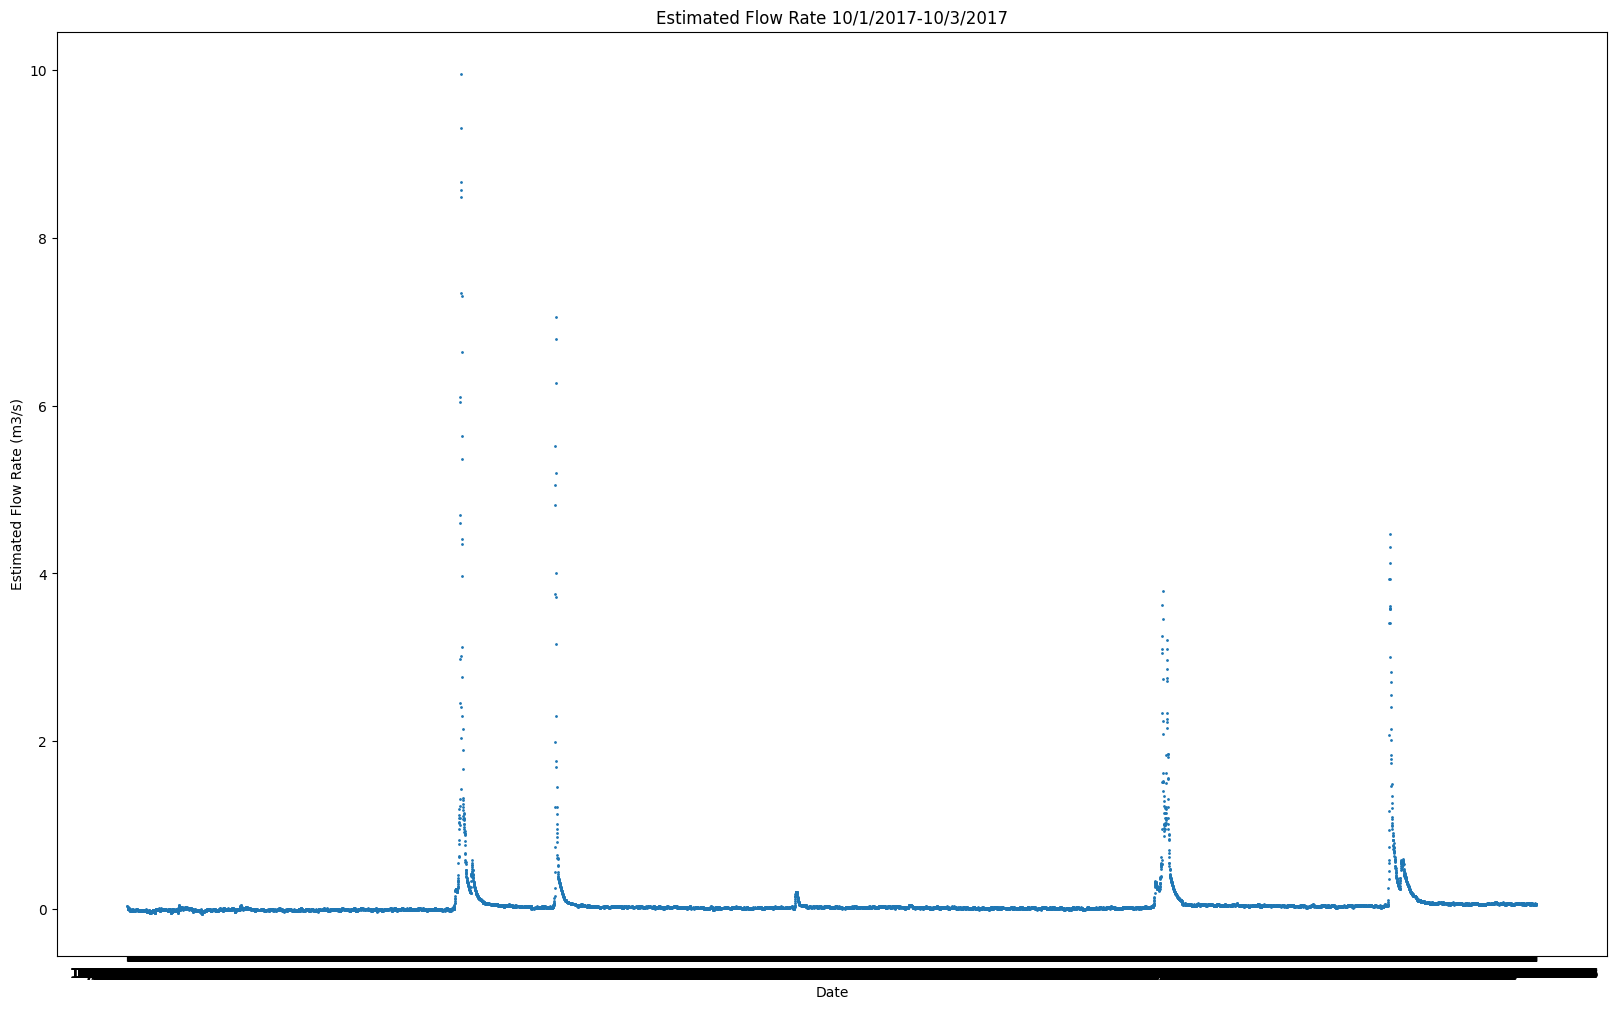

In [ ]:
plt.figure(figsize=(20,12))
plt.scatter(df2["Date and Time"], df2["Estimated Flow Rate (m3/s)"], s=1)
plt.title("Estimated Flow Rate 10/1/2017-10/3/2017")
plt.xlabel("Date")
plt.ylabel('Estimated Flow Rate (m3/s)')
plt.show()

Comment on the trend of Est. Flow Rate[m^3/s] for October 2017.
<br>
**Answer:**
<BR>


The data follows a constant straight pattern with clear peaks and troughs. However, certain points exhibit sharp upward spikes, deviating from the usual oscillatory trend.

## Histogram Plotting
Plot a histogram for Est. Flow Rate  data of September 2017. Be sure to include proper titles and axis labels on each of your plots.<br>
Plot a histogram for Est. Flow Rate data of October 2017. Be sure to include proper titles and axis labels on each of your plots.

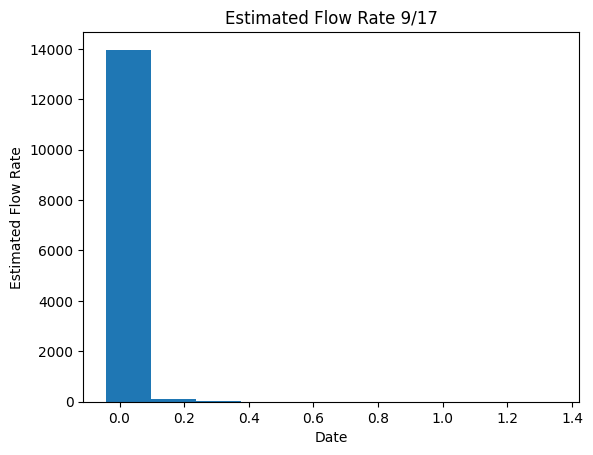

In [ ]:
plt.hist(df1["Est. Flow Rate[m^3/s]"])
plt.title("Estimated Flow Rate 9/17")
plt.xlabel("Date")
plt.ylabel('Estimated Flow Rate')
plt.show()

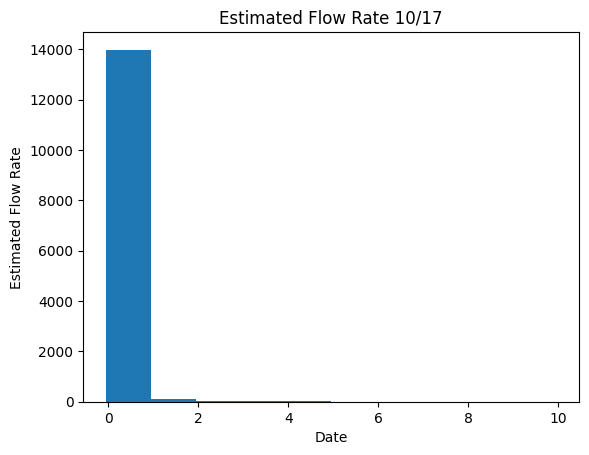

In [ ]:
plt.hist(df2["Estimated Flow Rate (m3/s)"])
plt.title("Estimated Flow Rate 10/17")
plt.xlabel("Date")
plt.ylabel('Estimated Flow Rate')
plt.show()

***Comment on the shape of both distributions.***
<br>
***Answer:***
<br>

The distribution in both histograms shows a highly skewed pattern, with one bar representing a significant peak, while the other bars are clustered near zero. This suggests that the data is heavily concentrated around a particular value, with very few occurrences at other levels.

# Boxplot

Generate a boxplot for Est. Flow Rate data of September 2017.<br>
*Generate* a boxplot for Est. Flow Rate data of October 2017.

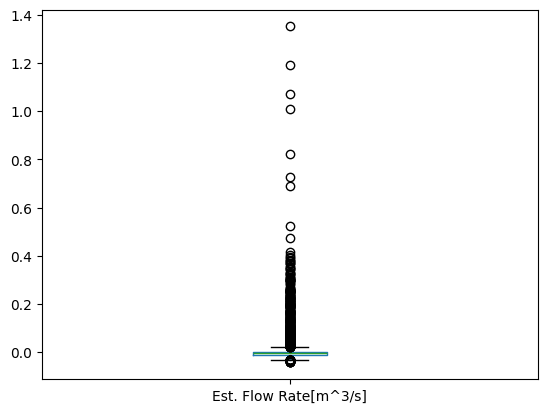

In [ ]:

boxplot1 = df1.boxplot(column=["Est. Flow Rate[m^3/s]"], grid=False)

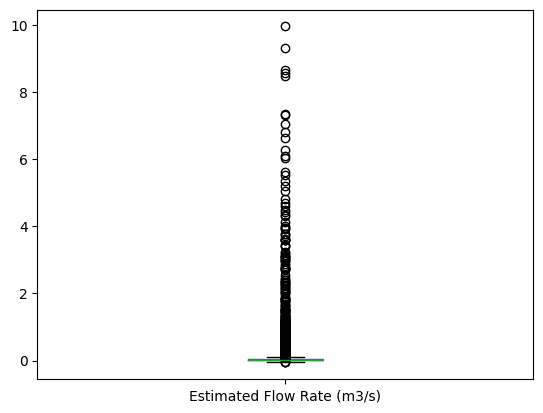

In [ ]:
boxplot2 = df2.boxplot(column=["Estimated Flow Rate (m3/s)"], grid=False)

***Comment on both boxplots***
<br>
***Answer:*** <br>

In the first box plot, the data points show an upward trend as they cluster above the box and become more spread out with increasing values. Some points also fall below the box, indicating potential outliers or data points that deviate significantly from the majority. In the second box plot, the box itself is almost nonexistent, suggesting a very small interquartile range. This pattern suggests that both datasets have some level of skewness, with more variability in the higher values and potential outliers in both directions.


#Confidence Interval

Generate the 95% confidence interval for the mean estimated flow rate of Septemebr 2017.


In [ ]:
stats.norm.interval(0.95, loc=np.mean(df1["Est. Flow Rate[m^3/s]"]), scale=stats.sem(df1["Est. Flow Rate[m^3/s]"]))

(-0.0005890705452862284, 0.0006043342287662121)

Interpret the confidence interval you generated.<br>
***Answer:***

The 95% confidence interval for the mean water temperature is between (X)°F and (Y)°F. This means that we are 95% confident that the true mean water temperature for the entire population lies within this range.

# Hypothesis testing
Suppose we are interested in testing if the mean estimated flow rate from September 2017 is statisticlly different from the mean estimated flow rate from October 2017.

***Question***<br>
How many samples are there in this experiment? What are they?<br>
***Answer***


There are 20 samples because we are using 10 rows of data from September 2017 and from October 2017.

# Independent Variable and Dependent Variable

***Question***<br>
What is the independent variable and what is the dependent variable of this experiment?

***Answer***

The months September 2017 and October 2017 are the independent variable and the estimated flow rate is the dependent variable.

***Question***<br>
What are the assumptions for the two sample t test?

***Answer***

The two groups being compared must be independent of each other. This means that the flow rate measurements from September should not influence the flow rate measurements from October, and vice versa.

The data within each group (September 2017 and October 2017) should follow a normal distribution.

The estimated flow rate should be measured on an interval or ratio scale, meaning it must be continuous and have meaningful distances between values.



```
# This is formatted as code
```

#Hypothesis testing
Use the appropraite statistical analysis technique.<br>
Conduct model adequacy and comment on the model adequacy.<br>
Conduct hypothesis testing

In [ ]:
t16=df1["Est. Flow Rate[m^3/s]"]
t17=df2["Estimated Flow Rate (m3/s)"]

In [ ]:
stats.shapiro(t16)

ShapiroResult(statistic=0.3093304499311397, pvalue=2.6277096229681046e-115)

In [ ]:
stats.shapiro(t17)

ShapiroResult(statistic=0.15043115059239143, pvalue=5.797915032230988e-121)

In [ ]:
stats.levene(t16,t17)

LeveneResult(statistic=319.0139543400415, pvalue=5.830822745630015e-71)

In [ ]:
stats.ttest_ind(t16,t17)

TtestResult(statistic=-22.18768384140037, pvalue=3.783535939485588e-108, df=28294.0)

In [ ]:
stat, p = stats.mannwhitneyu(t16, t17)
print('Statistics=%.3f, p=%.3f '% (stat, p))

Statistics=40097230.000, p=0.000 


Based on the tests, what can you conclude about the model assumptions?
<br>
**Answer:**

Given the violations of normality and variance equality, Welch’s t-test would be a better option as it adjusts for unequal variances. Alternatively, a Mann-Whitney U test could be used if you prefer a non-parametric approach that doesn’t assume normality or equal variances.

# 6-Step Hypothesis Testing

1. H0: $μ$16 = $μ$17 <br> Ha: $μ$16 $\ne$ $μ$17

2. $α$ =  0.05

3. Test statistic = 40097230

4. p value = 0.000

5. Decision: Reject H0 since p < 0.05

6. At 0.05 level of significance, there is sufficient evidence to conclude that the mean estimated flow rate in September 2017 is different from the mean estimated flow rate in October 2017.

# In the spalce below, type your experience with your colab project experience. What you like, what you dislike and what you would like to experience in the future colab projects.


I like Colab for its ease of use, free access to computational resources, and the ability to collaborate easily. However, it can be slow with large datasets, lacks some customization options, and sometimes disconnects unexpectedly. In the future, I’d appreciate better performance, more robust version control, and improved interactive visualizations.